In [1]:
import utils
from utils import *
from thompson_sampling_agent import ThompsonSamplingAgentTemporaryWrapper

# Mean reward might awkwardly drop, because most of the episodes end early

# Performace based on learning curves

Let's remove the convergence criteria and have a look at which one converges faster,
visuallly

100%|██████████| 100/100 [00:00<00:00, 165.61it/s]


Accuracy: 68.0
Mean episode length: 76.0


100%|██████████| 100/100 [00:00<00:00, 282.17it/s]


Accuracy: 61.0
Mean episode length: 76.0


100%|██████████| 100/100 [00:00<00:00, 491.18it/s]

Accuracy: 75.0
Mean episode length: 76.0


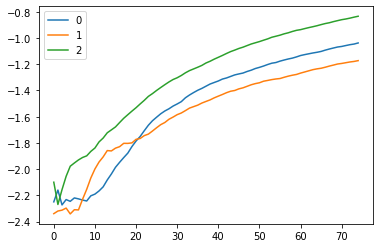

In [2]:
rewards = []

params_new = {
    # # Runner parameters
    'max_steps': 75,
    'num_episodes': 100,
    'convergence_count_start': 2000,
    # 'convergence_consecutive_limit': 15,    
    }

params = default_params() | params_new

from ucbq_agent_stateless import UCBQAgent

params['surrogate'] = True
params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params = default_params() | params_new
params = params | optimized_params
params['surrogate'] = True
params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params = default_params() | params_new
params['surrogate'] = False
params['agent'] = ThompsonSamplingAgentTemporaryWrapper
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)


# Beware, VS Code variable inspector can show wrong Size value

# Apply get_mean_rewards_across_episodes to each element in rewards
mean_rewards = [get_mean_rewards_across_episodes(rewards_all_experiments) for rewards_all_experiments in rewards]

pd.DataFrame(mean_rewards).T.plot()

In [3]:
np.sum(rewards_all_experiments)

-6251

Thompson sampling converges faster than the unoptimized version. The optimized version is bad.

Something might be wrong with the previous optimized params. We rand the optimization again,
and the learning curve greatly improved:

100%|██████████| 100/100 [00:00<00:00, 221.99it/s]


Accuracy: 74.0
Mean episode length: 76.0


100%|██████████| 100/100 [00:00<00:00, 247.42it/s]


Accuracy: 64.0
Mean episode length: 76.0


100%|██████████| 100/100 [00:00<00:00, 337.93it/s]


Accuracy: 92.0
Mean episode length: 76.0


100%|██████████| 100/100 [00:00<00:00, 495.12it/s]

Accuracy: 77.0
Mean episode length: 76.0


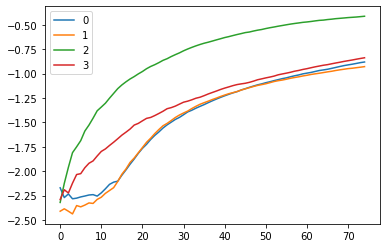

In [3]:
rewards = []

params_new = {
    # # Runner parameters
    'max_steps': 75,
    'num_episodes': 100,
    'convergence_count_start': 2000,
    # 'convergence_consecutive_limit': 15,    
    }

params = default_params() | params_new

from ucbq_agent_stateless import UCBQAgent

params['surrogate'] = True
params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params['surrogate'] = True
params['agent'] = UCBQAgent
params['stationary_noise'] = True
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params = default_params() | params_new
optimized_params = {'target': 94.69999999999999, 'params': {'alpha': 0.44789352617590517, 'alpha_decay': 908.6869075900024, 'alpha_min': 0.2936141483736795, 'epsilon': 0.28777533858634874, 'epsilon_decay': 130.8985435461594, 'epsilon_min': 0.019366957870297075, 'gamma': 0.678835532939891, 'surrogate_c_interval': 26.183745804007025, 'surrogate_c_interval_min': 32.60005246529492}}
params = params | optimized_params['params']
params['surrogate'] = True
params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params = default_params() | params_new
params['surrogate'] = False
params['agent'] = ThompsonSamplingAgentTemporaryWrapper
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)


# Beware, VS Code variable inspector can show wrong Size value

# Apply get_mean_rewards_across_episodes to each element in rewards
mean_rewards = [get_mean_rewards_across_episodes(rewards_all_experiments) for rewards_all_experiments in rewards]

pd.DataFrame(mean_rewards).T.plot()

In the long term, the non-optimized version an Thompson sampling seem to be
outperforming. This makes sense, cause the optimized version was optimized for
an episode length of 75.

100%|██████████| 100/100 [00:08<00:00, 12.25it/s]


Accuracy: 99.0
Mean episode length: 1001.0


100%|██████████| 100/100 [00:04<00:00, 24.30it/s]


Accuracy: 77.0
Mean episode length: 1001.0


100%|██████████| 100/100 [00:03<00:00, 26.59it/s]


Accuracy: 94.0
Mean episode length: 1001.0


100%|██████████| 100/100 [00:03<00:00, 27.02it/s]


Accuracy: 90.0
Mean episode length: 1001.0


100%|██████████| 100/100 [00:02<00:00, 38.52it/s]


Accuracy: 96.0
Mean episode length: 1001.0


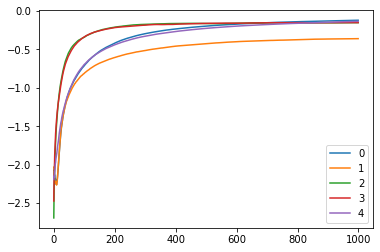

In [4]:
rewards = []

params_new = {
    # # Runner parameters
    'max_steps': 1000,
    'num_episodes': 100,
    'convergence_count_start': 100000,
    # 'convergence_consecutive_limit': 15,    
    }

params = default_params() | params_new

from ucbq_agent_stateless import UCBQAgent

params['surrogate'] = True
params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params['surrogate'] = True
params['agent'] = UCBQAgent
params['stationary_noise'] = True
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params = default_params() | params_new
optimized_params = {'target': 94.69999999999999, 'params': {'alpha': 0.44789352617590517, 'alpha_decay': 908.6869075900024, 'alpha_min': 0.2936141483736795, 'epsilon': 0.28777533858634874, 'epsilon_decay': 130.8985435461594, 'epsilon_min': 0.019366957870297075, 'gamma': 0.678835532939891, 'surrogate_c_interval': 26.183745804007025, 'surrogate_c_interval_min': 32.60005246529492}}
params = params | optimized_params ['params']
params['surrogate'] = True
params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params = default_params() | params_new
optimized_params = {'target': 94.69999999999999, 'params': {'alpha': 0.44789352617590517, 'alpha_decay': 908.6869075900024, 'alpha_min': 0.2936141483736795, 'epsilon': 0.28777533858634874, 'epsilon_decay': 130.8985435461594, 'epsilon_min': 0.019366957870297075, 'gamma': 0.678835532939891, 'surrogate_c_interval': 26.183745804007025, 'surrogate_c_interval_min': 32.60005246529492}}
params = params | optimized_params ['params']
params['surrogate'] = True
params['agent'] = UCBQAgent
params['stationary_noise'] = True
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params = default_params() | params_new
params['surrogate'] = False
params['agent'] = ThompsonSamplingAgentTemporaryWrapper
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)


# Beware, VS Code variable inspector can show wrong Size value

# Apply get_mean_rewards_across_episodes to each element in rewards
mean_rewards = [get_mean_rewards_across_episodes(rewards_all_experiments) for rewards_all_experiments in rewards]

pd.DataFrame(mean_rewards).T.plot()

Let's compare stationary vs non-stationary

100%|██████████| 1/1 [00:06<00:00,  6.03s/it]


Accuracy: 100.0
Mean episode length: 20001.0


100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


Accuracy: 100.0
Mean episode length: 20001.0


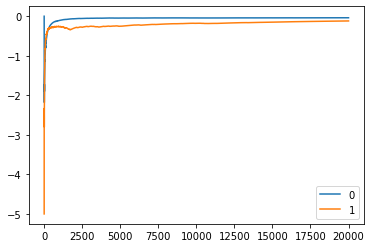

In [14]:
rewards = []

params_new = {
    # # Runner parameters
    'max_steps': 20000,
    'num_episodes': 1,
    'convergence_count_start': 1000000,
    # 'convergence_consecutive_limit': 15,    
    }

params = default_params() | params_new

from ucbq_agent_stateless import UCBQAgent

params['surrogate'] = True
params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params = default_params() | params_new

params['surrogate'] = True
params['agent'] = UCBQAgent
params['stationary_noise'] = True
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

mean_rewards = [get_mean_rewards_across_episodes(rewards_all_experiments) for rewards_all_experiments in rewards]

pd.DataFrame(mean_rewards).T.plot()

The non-stationary seems to be performing better. Before, we thought that
stationarity would be better. However, what we showed was that for a constant epsilon of 1
and a learning rate of 1, it learns the "true average reward" as well as the
"true" q-value for each action. That is not the same as it learning the best
reward in the long run.

The optimized parameters from the 5 agent comparison seemed to be performing best, 
both for stationary and non stationary noise. Let's see if we can figure out
who is better among the two:

100%|██████████| 100/100 [00:13<00:00,  7.15it/s]


Accuracy: 95.0
Mean episode length: 1001.0


100%|██████████| 100/100 [00:51<00:00,  1.94it/s]


Accuracy: 91.0
Mean episode length: 1001.0


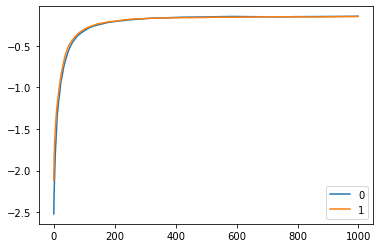

In [18]:
rewards = []

params_new = {
    # # Runner parameters
    'max_steps': 1000,
    'num_episodes': 100,
    'convergence_count_start': 1000000,
    # 'convergence_consecutive_limit': 15,    
    }

params = default_params() | params_new
optimized_params = {'target': 94.69999999999999, 'params': {'alpha': 0.44789352617590517, 'alpha_decay': 908.6869075900024, 'alpha_min': 0.2936141483736795, 'epsilon': 0.28777533858634874, 'epsilon_decay': 130.8985435461594, 'epsilon_min': 0.019366957870297075, 'gamma': 0.678835532939891, 'surrogate_c_interval': 26.183745804007025, 'surrogate_c_interval_min': 32.60005246529492}}
params = params | optimized_params ['params']

params['surrogate'] = True
params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params = default_params() | params_new
optimized_params = {'target': 94.69999999999999, 'params': {'alpha': 0.44789352617590517, 'alpha_decay': 908.6869075900024, 'alpha_min': 0.2936141483736795, 'epsilon': 0.28777533858634874, 'epsilon_decay': 130.8985435461594, 'epsilon_min': 0.019366957870297075, 'gamma': 0.678835532939891, 'surrogate_c_interval': 26.183745804007025, 'surrogate_c_interval_min': 32.60005246529492}}
params = params | optimized_params ['params']

params['surrogate'] = True
params['agent'] = UCBQAgent
params['stationary_noise'] = True
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

mean_rewards = [get_mean_rewards_across_episodes(rewards_all_experiments) for rewards_all_experiments in rewards]

pd.DataFrame(mean_rewards).T.plot()

# Smoothing doesn't make a difference

100%|██████████| 100/100 [00:03<00:00, 26.20it/s]


Accuracy: 93.0
Mean episode length: 1001.0


100%|██████████| 100/100 [00:03<00:00, 25.25it/s]


Accuracy: 94.0
Mean episode length: 1001.0


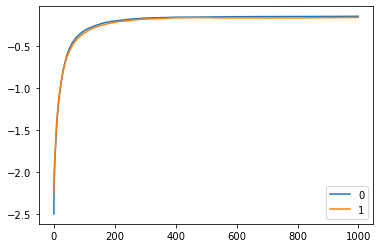

In [8]:
rewards = []

params_new = {
    # # Runner parameters
    'max_steps': 1000,
    'num_episodes': 100,
    'convergence_count_start': 1000000,
    # 'convergence_consecutive_limit': 15,    
    }

params = default_params() | params_new
optimized_params = {'target': 94.69999999999999, 'params': {'alpha': 0.44789352617590517, 'alpha_decay': 908.6869075900024, 'alpha_min': 0.2936141483736795, 'epsilon': 0.28777533858634874, 'epsilon_decay': 130.8985435461594, 'epsilon_min': 0.019366957870297075, 'gamma': 0.678835532939891, 'surrogate_c_interval': 26.183745804007025, 'surrogate_c_interval_min': 32.60005246529492}}
params = params | optimized_params ['params']

params['surrogate'] = True
params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params = default_params() | params_new
optimized_params = {'target': 94.69999999999999, 'params': {'alpha': 0.44789352617590517, 'alpha_decay': 908.6869075900024, 'alpha_min': 0.2936141483736795, 'epsilon': 0.28777533858634874, 'epsilon_decay': 130.8985435461594, 'epsilon_min': 0.019366957870297075, 'gamma': 0.678835532939891, 'surrogate_c_interval': 26.183745804007025, 'surrogate_c_interval_min': 32.60005246529492}}
params = params | optimized_params ['params']

params['surrogate'] = True
params['agent'] = UCBQAgent
params['smooth'] = True
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

mean_rewards = [get_mean_rewards_across_episodes(rewards_all_experiments) for rewards_all_experiments in rewards]

pd.DataFrame(mean_rewards).T.plot()